# Nearshoring

Análisis pertinente al decreto de Nearshoring propuesta por la [Secretaría de Economía](https://www.gob.mx/shcp/prensa/comunicado-no-68-gobierno-de-mexico-fortalece-inversiones-por-nearshoring-en-todo-el-pais?idiom=es) en México. Para esto, se filtraron los datos de las unidades económicas pertinentes, utilizando el DENUE 2022 y se agruparon los datos por hexágonos de H3 con resolución 5. Posteriormente, los datos se normalizaron utilizando todas las unidades económicas.

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Download data

### DENUE Industry

In [4]:
query = """SELECT * FROM denue.denue_2022 WHERE \"codigo_act\" LIKE \'31%%\'or \"codigo_act\" LIKE \'32%%\'
or \"codigo_act\" LIKE \'33%%\' or \"codigo_act\" LIKE \'51211%%\'"""
query

'SELECT * FROM denue.denue_2022 WHERE "codigo_act" LIKE \'31%%\'or "codigo_act" LIKE \'32%%\'\nor "codigo_act" LIKE \'33%%\' or "codigo_act" LIKE \'51211%%\''

In [5]:
denue_all = aup.gdf_from_query(query)
print(denue_all.shape)
denue_all.head(2)

(608640, 43)


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,9235175,15057512111000014000000000S0,INDUSTRIAS AUDIOVISUALES MEXICANOS,INDUSTRIAS AUDIOVISUALES MEXICANOS SA DE CV,512111,Producción de películas,31 a 50 personas,CALLE,CALLE DEL ESFUERZO,CALLE,...,0353,009,5537070813,IMIRON@CINECOBR.COM.MX,WWW.CINECOLOR.COM.MX,Fijo,19.460408,-99.227091,2020-04,POINT (-99.22709 19.46041)
1,8696385,15104512111000021000000000S5,BODEGA ARGOS PRODUCCIONES,CARAVANA UNO SA DE CV,512111,Producción de películas,0 a 5 personas,AVENIDA,VIA GUSTAVO BAZ,CALLE,...,0938,019,None,None,None,Fijo,19.518101,-99.213855,2019-11,POINT (-99.21385 19.51810)


### Industrias nearshoring

In [6]:
query = """SELECT * FROM denue.denue_2022 WHERE \"codigo_act\" LIKE \'3363%%\'or \"codigo_act\" LIKE \'3254%%\'
or \"codigo_act\" LIKE \'3359%%\' or \"codigo_act\" LIKE \'3344%%\' or \"codigo_act\" LIKE \'3253%%\' or \"codigo_act\" LIKE \'3391%%\' or
\"codigo_act\" LIKE \'3253%%\' or \"codigo_act\" LIKE \'33641%%\' or  \"codigo_act\" LIKE \'3345%%\'  or  \"codigo_act\" LIKE \'51211%%\' """
query

'SELECT * FROM denue.denue_2022 WHERE "codigo_act" LIKE \'3363%%\'or "codigo_act" LIKE \'3254%%\'\nor "codigo_act" LIKE \'3359%%\' or "codigo_act" LIKE \'3344%%\' or "codigo_act" LIKE \'3253%%\' or "codigo_act" LIKE \'3391%%\' or\n"codigo_act" LIKE \'3253%%\' or "codigo_act" LIKE \'33641%%\' or  "codigo_act" LIKE \'3345%%\'  or  "codigo_act" LIKE \'51211%%\' '

In [7]:
denue_near = aup.gdf_from_query(query)
print(denue_near.shape)
denue_near.head(4)

(7384, 43)


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,8696245,15104512111000011000000000S6,CARAVANA UNO,CARAVANA UNO SA DE CV,512111,Producción de películas,0 a 5 personas,CALLE,TEMAZCAL,PRIVADA,...,1885,021,None,None,None,Fijo,19.534904,-99.200916,2019-11,POINT (-99.20092 19.53490)
1,9235175,15057512111000014000000000S0,INDUSTRIAS AUDIOVISUALES MEXICANOS,INDUSTRIAS AUDIOVISUALES MEXICANOS SA DE CV,512111,Producción de películas,31 a 50 personas,CALLE,CALLE DEL ESFUERZO,CALLE,...,0353,009,5537070813,IMIRON@CINECOBR.COM.MX,WWW.CINECOLOR.COM.MX,Fijo,19.460408,-99.227091,2020-04,POINT (-99.22709 19.46041)
2,8433615,15004512113000011000000000U4,EXPLOCION CREATIVA,None,512113,"Producción de videoclips, comerciales y otros ...",0 a 5 personas,CALLE,GENERAL AGUSTIN MILLAN,CALLE,...,0044,001,None,None,None,Fijo,18.866028,-99.894428,2019-11,POINT (-99.89443 18.86603)
3,8802051,15106512112000011000000000M9,MEDIACOM,CABLEVISION REGIONAL SA DE CV,512112,Producción de programas para la televisión,0 a 5 personas,CALLE,ANDRES QUINTANA ROO,AVENIDA,...,0449,016,None,None,None,Fijo,19.286799,-99.662621,2019-11,POINT (-99.66262 19.28680)


### Hexágonos

In [32]:
mun_gdf = aup.gdf_from_db("mpos_2020","marco")

In [33]:
gdf = mun_gdf.to_crs("EPSG:6372")
gdf = gdf.buffer(1).reset_index().rename(columns={0: "geometry"})
gdf = gdf.set_geometry("geometry")
gdf = gdf.to_crs("EPSG:4326")
# poly_wkt = gdf.dissolve().geometry.to_wkt()[0]

In [34]:
hex_gdf = aup.create_hexgrid(gdf, 7)

In [35]:
# hex_gdf = aup.gdf_from_db("hexgrid_5", "hexgrid")
print(hex_gdf.shape)
hex_gdf.head(4)

(329541, 2)


,hex_id_7,geometry
0,87498e375ffffff,"POLYGON ((-102.22043 21.86888, -102.21174 21.8..."
1,87498ea56ffffff,"POLYGON ((-102.32977 21.68615, -102.32110 21.6..."
2,87498e35affffff,"POLYGON ((-102.18391 21.99799, -102.17521 22.0..."
3,874988d82ffffff,"POLYGON ((-102.37690 21.87093, -102.36822 21.8..."


In [38]:
hex_gdf.to_crs("EPSG:6372").area

0         6.045038e+06
1         6.046231e+06
2         6.045282e+06
3         6.049398e+06
4         6.044963e+06
              ...     
329599    6.072912e+06
329600    6.070828e+06
329601    6.069144e+06
329602    6.066996e+06
329603    6.072070e+06
Length: 329541, dtype: float64

## Spatial intersection

In [40]:
denue_in_hex = gpd.sjoin(denue_near, hex_gdf)
denue_hex = denue_in_hex.groupby([f'hex_id_7']).count()

In [42]:
denue_hex = denue_hex.reset_index()
hex_denue_gdf = hex_gdf.merge(denue_hex[['hex_id_7','clee']], on='hex_id_7')

In [43]:
denue_in_hex = gpd.sjoin(denue_all, hex_gdf)
denue_hex = denue_in_hex.groupby([f'hex_id_7']).count()
denue_hex = denue_hex.reset_index()
hex_denue_gdf = hex_denue_gdf.merge(denue_hex[['hex_id_7','codigo_act']], on='hex_id_7')

### Spatial analysis

In [46]:
hex_denue_gdf = hex_denue_gdf.rename(columns={'clee':'nearshoring_industry',
                             'codigo_act':'denue'})
hex_denue_gdf['nearshoring_pct'] = hex_denue_gdf['nearshoring_industry'] / hex_denue_gdf['denue']
print(hex_denue_gdf.shape)
hex_denue_gdf.head(4)

(2190, 5)


,hex_id_7,geometry,nearshoring_industry,denue,nearshoring_pct
0,87498e36cffffff,"POLYGON ((-102.30650 21.90073, -102.29781 21.9...",3,117,0.025641
1,87498e365ffffff,"POLYGON ((-102.28822 21.86296, -102.27953 21.8...",11,450,0.024444
2,87498e36dffffff,"POLYGON ((-102.32738 21.91464, -102.31870 21.9...",1,25,0.040000
3,874988d95ffffff,"POLYGON ((-102.35601 21.85702, -102.34733 21.8...",1,2,0.500000


<AxesSubplot:>

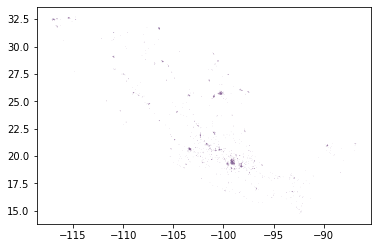

In [45]:
hex_denue_gdf.plot('nearshoring_industry')

In [30]:
m = folium.Map(tiles="cartodbpositron")

# folium.GeoJson(, name="DENUE Nearshoring").add_to(m)

folium.Choropleth(
    geo_data=hex_denue_gdf,
    name="choropleth",
    data=hex_denue_gdf,
    columns=["hex_id_5","nearshoring_industry"],
    key_on="hex_id_5",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Nearshoring industries",
).add_to(m)

folium.LayerControl().add_to(m)

display(m)

ValueError: key_on `'hex_id_5'` not found in GeoJSON.

In [48]:
hex_denue_gdf.to_file('../../data/processed/nearshoring_res7.geojson')

In [20]:
from IPython.display import display
m = folium.Map(location=(45.5236, -122.6750))
